# Aberrations in Holograms

Irregularities in the imaging systems can lead to optical aberrations that distort holograms. Identifying and correcting problems in an imaging system can be frustrating and labor intensive. Including a model for optical aberrations in our hologram fitting methods allows us to better analyze hologram fits with only minor computational costs. Additonally, including aberrations in our analysis provides an easy and robust way to correct for a variety of aberrations characteristic of different experimental systems. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pylorenzmie.theory.AberratedLorenzMie import AberratedLorenzMie
from pylorenzmie.utilities import coordinates
from pylorenzmie.theory import (Sphere, Instrument)
from pylorenzmie.utilities import aziavg

	Numba needs NumPy 1.20 or less
INFO:configuration: Falling back to standard implementation
	Numba needs NumPy 1.20 or less
INFO:configuration: Falling back to standard implementation


In [2]:
instrument = Instrument()
instrument.magnification = 0.048
instrument.wavelength = 0.447
instrument.n_m = 1.340

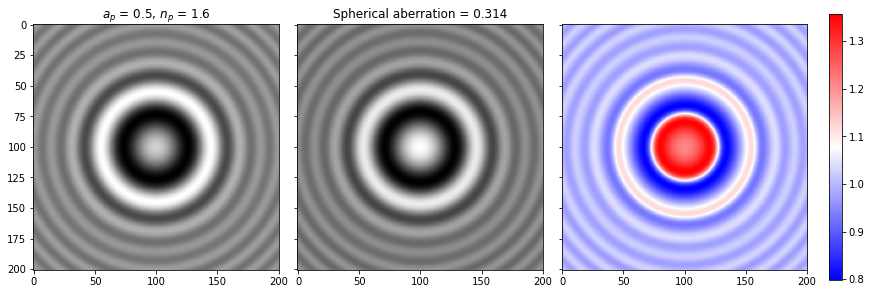

In [30]:
coords = coordinates((201, 201))

pa = Sphere()

a_p, n_p = 0.5, 1.6
pa.r_p = [100, 100, 200]
pa.a_p = a_p
pa.n_p = n_p

# Generate aberrated holograms
kernel0 = AberratedLorenzMie(coords, pa, instrument)
kernel0.field()
field0 = kernel0.field()
# Compute hologram from field and show it
field0[0, :] += 1.
hologram0 = np.sum(np.real(field0 * np.conj(field0)), axis=0)

# Generate aberrated hologram
kernela = AberratedLorenzMie(coords, pa, instrument)

### SET ABERRATIONS ###
spher_ab = 0.1*np.pi

kernela.spherical = spher_ab
kernela.field()
fielda = kernela.field()
# Compute hologram from field and show it
fielda[0, :] += 1.
holograma = np.sum(np.real(fielda * np.conj(fielda)), axis=0)

# Plot unaberrated and aberrated holograms
fig, (axa, axb, axc) = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey = True, constrained_layout=True)

axa.imshow(hologram0.reshape(201, 201), cmap='gray')
axa.set_title(f"$a_p$ = {round(a_p,2)}, $n_p$ = {round(n_p,2)}")

axb.imshow(holograma.reshape(201, 201), cmap='gray')
axb.set_title(f"Spherical aberration = {round(spher_ab,3)}")

c_plot = axc.imshow((holograma/hologram0).reshape(201, 201), cmap='bwr')
plt.colorbar(c_plot,ax=axc)

plt.show()

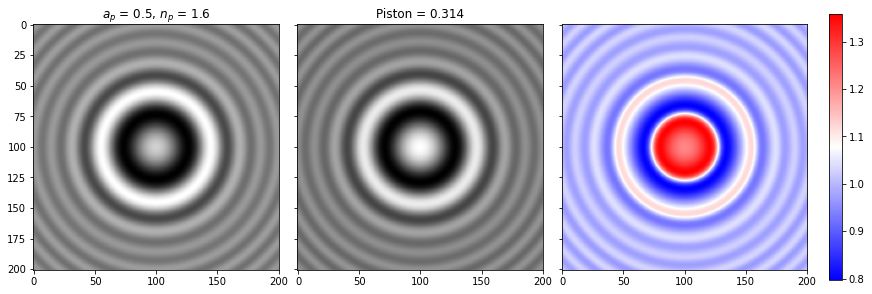

In [31]:
# Generate aberrated hologram
kernela = AberratedLorenzMie(coords, pa, instrument)

piston_ab = 0.1*np.pi
kernela.spherical = 0.
kernela.piston = piston_ab
kernela.field()
fielda = kernela.field()
# Compute hologram from field and show it
fielda[0, :] += 1.
holograma = np.sum(np.real(fielda * np.conj(fielda)), axis=0)

# Plot unaberrated and aberrated holograms
fig, (axa, axb, axc) = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey = True, constrained_layout=True)

axa.imshow(hologram0.reshape(201, 201), cmap='gray')
axa.set_title(f"$a_p$ = {round(a_p,2)}, $n_p$ = {round(n_p,2)}")

axb.imshow(holograma.reshape(201, 201), cmap='gray')
axb.set_title(f"Piston = {round(piston_ab,3)}")

c_plot = axc.imshow((holograma/hologram0).reshape(201, 201), cmap='bwr')
plt.colorbar(c_plot,ax=axc)

plt.show()

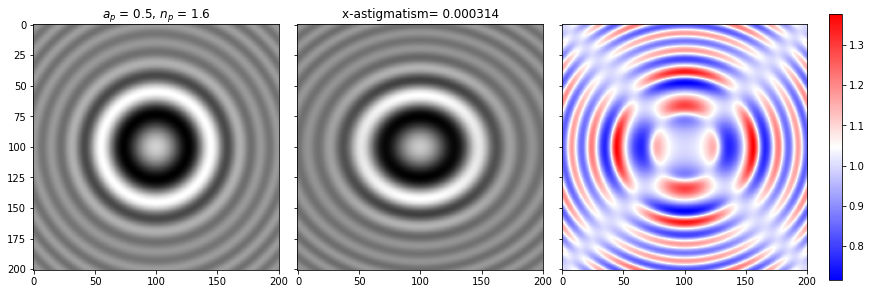

In [13]:
# Generate aberrated hologram
kernela = AberratedLorenzMie(coords, pa, instrument)

xast_ab = .0001*np.pi
kernela.spherical = 0.
kernela.xastigmatism = xast_ab
kernela.field()
fielda = kernela.field()
# Compute hologram from field and show it
fielda[0, :] += 1.
holograma = np.sum(np.real(fielda * np.conj(fielda)), axis=0)

# Plot unaberrated and aberrated holograms
fig, (axa, axb, axc) = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey = True, constrained_layout=True)

axa.imshow(hologram0.reshape(201, 201), cmap='gray')
axa.set_title(f"$a_p$ = {round(a_p,2)}, $n_p$ = {round(n_p,2)}")

axb.imshow(holograma.reshape(201, 201), cmap='gray')
axb.set_title(f"x-astigmatism= {round(xast_ab,6)}")

c_plot = axc.imshow((holograma/hologram0).reshape(201, 201), cmap='bwr')
plt.colorbar(c_plot,ax=axc)

plt.show()

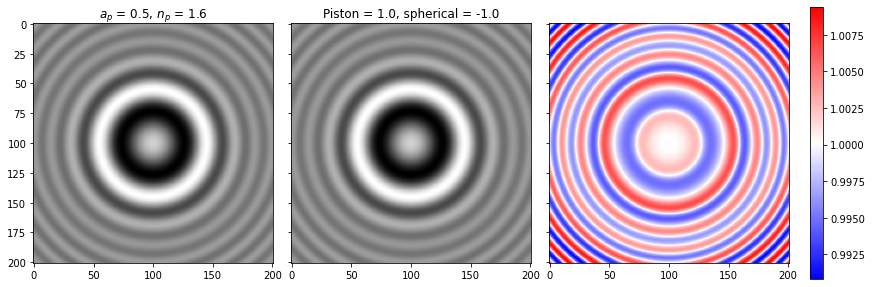

In [14]:
# Generate aberrated hologram
kernela = AberratedLorenzMie(coords, pa, instrument)

spher_ab = -1.
piston_ab = 1.
kernela.spherical = spher_ab
kernela.piston = piston_ab
kernela.field()
fielda = kernela.field()
# Compute hologram from field and show it
fielda[0, :] += 1.
holograma = np.sum(np.real(fielda * np.conj(fielda)), axis=0)

# Plot unaberrated and aberrated holograms
fig, (axa, axb, axc) = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey = True, constrained_layout=True)

axa.imshow(hologram0.reshape(201, 201), cmap='gray')
axa.set_title(f"$a_p$ = {round(a_p,2)}, $n_p$ = {round(n_p,2)}")

axb.imshow(holograma.reshape(201, 201), cmap='gray')
axb.set_title(f"Piston = {round(piston_ab,3)}, spherical = {round(spher_ab,3)}")

c_plot = axc.imshow((holograma/hologram0).reshape(201, 201), cmap='bwr')
plt.colorbar(c_plot,ax=axc)

plt.show()

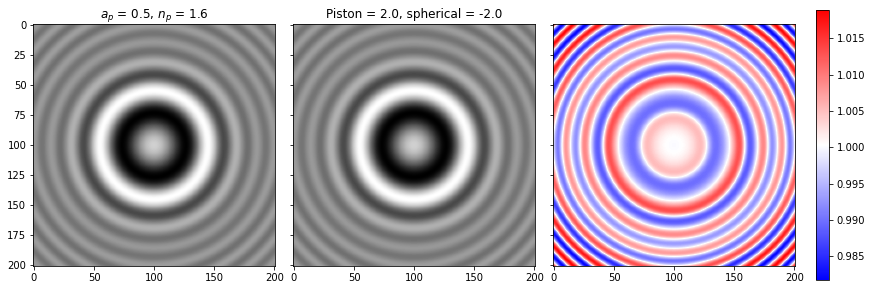

In [16]:
# Generate aberrated hologram
kernela = AberratedLorenzMie(coords, pa, instrument)

spher_ab = -2.
piston_ab = 2.
kernela.spherical = spher_ab
kernela.piston = piston_ab
kernela.field()
fielda = kernela.field()
# Compute hologram from field and show it
fielda[0, :] += 1.
holograma = np.sum(np.real(fielda * np.conj(fielda)), axis=0)

# Plot unaberrated and aberrated holograms
fig, (axa, axb, axc) = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey = True, constrained_layout=True)

axa.imshow(hologram0.reshape(201, 201), cmap='gray')
axa.set_title(f"$a_p$ = {round(a_p,2)}, $n_p$ = {round(n_p,2)}")

axb.imshow(holograma.reshape(201, 201), cmap='gray')
axb.set_title(f"Piston = {round(piston_ab,3)}, spherical = {round(spher_ab,3)}")

c_plot = axc.imshow((holograma/hologram0).reshape(201, 201), cmap='bwr')
plt.colorbar(c_plot,ax=axc)

plt.show()

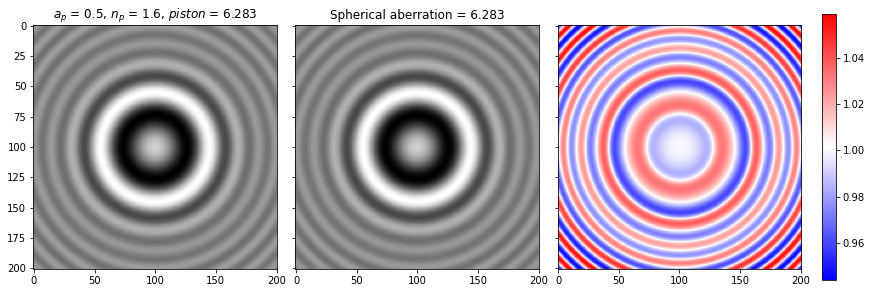

In [20]:
coords = coordinates((201, 201))

pa = Sphere()

a_p, n_p = 0.5, 1.6
pa.r_p = [100, 100, 200]
pa.a_p = a_p
pa.n_p = n_p

# Generate aberrated holograms
kernelp = AberratedLorenzMie(coords, pa, instrument)

piston_ab = 2*np.pi
kernelp.piston = piston_ab
kernelp.field()
fieldp = kernelp.field()
# Compute hologram from field and show it
fieldp[0, :] += 1.
hologramp = np.sum(np.real(fieldp * np.conj(fieldp)), axis=0)

# Generate aberrated hologram
kernela = AberratedLorenzMie(coords, pa, instrument)

spher_ab = 2*np.pi
kernela.spherical = spher_ab
kernela.field()
fielda = kernela.field()
# Compute hologram from field and show it
fielda[0, :] += 1.
holograma = np.sum(np.real(fielda * np.conj(fielda)), axis=0)

# Plot unaberrated and aberrated holograms
fig, (axa, axb, axc) = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey = True, constrained_layout=True)

axa.imshow(hologramp.reshape(201, 201), cmap='gray')
axa.set_title(f"$a_p$ = {round(a_p,2)}, $n_p$ = {round(n_p,2)}, $piston$ = {round(piston_ab,3)}")

axb.imshow(holograma.reshape(201, 201), cmap='gray')
axb.set_title(f"Spherical aberration = {round(spher_ab,3)}")

c_plot = axc.imshow((holograma/hologramp).reshape(201, 201), cmap='bwr')
plt.colorbar(c_plot,ax=axc)

plt.show()